In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%run cityscape_selective_search.ipynb

In [3]:
path = "D:/cityscape/leftImg8bit/val/frankfurt/frankfurt_000000_000294_leftImg8bit.png"
img = cv2.imread(path)

In [4]:
rects = selective_search(path)

In [8]:
from tensorflow.keras.models import load_model
model = load_model('C:/Users/Eliaz/Documents/GitHub/Projet-object-detection-2A-Gitlab/Projet-object-detection-2A/model/model_id_cityscape.h5')

In [14]:
from IPython.display import display, clear_output

img_size = 96
progression = 0

for rect in rects:
    clear_output(wait=True)
    display(str(progression)+'/'+str(len(rects)))
    progression += 1
    x, y, w, h = rect
    sub_img = img[y:y+h, x:x+w]
    sub_img = cv2.resize(sub_img, (img_size, img_size))
    sub_img = np.expand_dims(sub_img, axis=0)
    # sub_img = preprocess_input(sub_img)
    pred = model.predict(sub_img)
    if pred[0][0] > 0.5:
        #VEHICULE
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    elif pred[0][1] > 0.5:
        #PIETON
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)

'8499/8500'

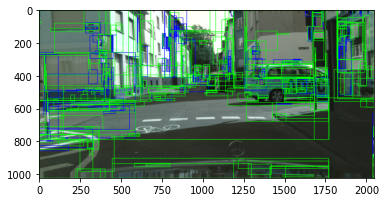

In [15]:
plt.imshow(img)